1. Setup


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



2. Loading data

In [258]:
route_test = './archive/aug_test.csv'
separator = ','
df_test = pd.read_csv(route_test, sep=separator)
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [259]:
route_train = './archive/aug_train.csv'
separator = ','
df_train = pd.read_csv(route_train, sep=separator)
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


3. exploratory data Analysis

In [ ]:
from pandas_profiling import ProfileReport

prof = ProfileReport(df_train,'minimal=True')

name = input('Name of the EDAs file: ')+'.html'

prof.to_file(output_file=name)

3.1 General Analysis

In [260]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [261]:
print('Rows and Columns in train dataset:', df_train.shape)
print('Rows and Columns in test dataset:', df_test.shape)


Rows and Columns in train dataset: (19158, 14)
Rows and Columns in test dataset: (2129, 13)


In [262]:
print('Number of nulls in train dataset:',df_train.isnull().sum())

Number of nulls in train dataset: enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


3.2 Target distribution

0 = not looking for job change
1 = looking for job change

In [263]:
df_train['target'] = df_train.target.astype(int) #convert target into int


In [264]:
print('Number of target values:')
df_train.target.value_counts()

Number of target values:


0    14381
1     4777
Name: target, dtype: int64

/home/manuel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


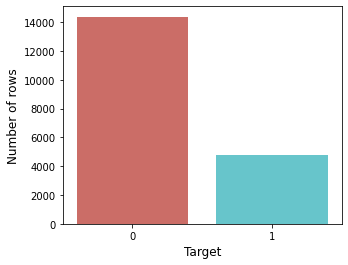

In [265]:
plt.figure(figsize=(5, 4))
sns.barplot(df_train.target.value_counts().index,
    df_train.target.value_counts(),palette='hls')                                                                                                                       
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.show()

4. Data Processing

In [266]:
#df_train.sample(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
18480,12661,city_75,0.939,Male,Has relevent experience,Part time course,Graduate,STEM,19,NaN,NaN,>4,112,0
12046,12920,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,Other,>20,10000+,Pvt Ltd,>4,70,0


In [267]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [318]:
df_train.nunique()

gender                   3
relevent_experience      2
enrolled_university      3
education_level          5
major_discipline         6
experience              22
company_size             8
company_type             6
last_new_job             6
training_hours         241
target                   2
dtype: int64

In [269]:
#delete values with high cardinality or no relevant for the study
df_train = df_train.drop(['city','enrollee_id','city_development_index'],axis=1)
df_test = df_test.drop(['city','enrollee_id','city_development_index'],axis=1)

In [270]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               14650 non-null  object
 1   relevent_experience  19158 non-null  object
 2   enrolled_university  18772 non-null  object
 3   education_level      18698 non-null  object
 4   major_discipline     16345 non-null  object
 5   experience           19093 non-null  object
 6   company_size         13220 non-null  object
 7   company_type         13018 non-null  object
 8   last_new_job         18735 non-null  object
 9   training_hours       19158 non-null  int64 
 10  target               19158 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 1.6+ MB


In [271]:
print('Number of nulls in train dataset: ',df_train.isnull().sum())

Number of nulls in train dataset:  gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
training_hours            0
target                    0
dtype: int64


In [272]:
numeric= [x for x in df_train.dtypes.index if (df_train.dtypes[x]=='float64' or df_train.dtypes[x]=='int64')]
categoric= [x for x in df_train.dtypes.index if df_train.dtypes[x]=='object']

print("Numeric:",numeric)
print("Categoric:",categoric)

Numeric: ['training_hours', 'target']
Categoric: ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [273]:
def fill_nulls_with_most_frequent_category(DataFrame,ColumnName):
    #obtain category type object analyzing whole dataset
    most_frequent_category=DataFrame[ColumnName].mode()[0]
    print(most_frequent_category)
    #fill column with the most frequent value
    DataFrame[ColumnName].fillna(most_frequent_category,inplace=True)    

In [274]:
for i in df_train.select_dtypes(include = "object").columns:
    print(i)
    impute_nan_most_frequent_category(df_train, i)

for i in df_test.select_dtypes(include = "object").columns:
    impute_nan_most_frequent_category(df_test, i)

gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job


In [275]:
df_train.isnull().sum()

gender                 0
relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
company_type           0
last_new_job           0
training_hours         0
target                 0
dtype: int64

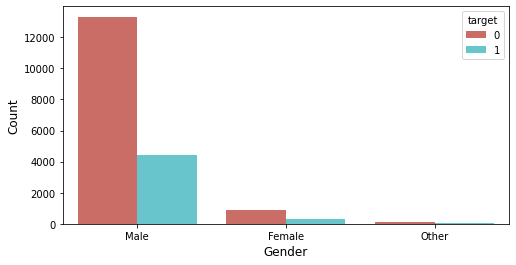

In [317]:
#Gender relation with target
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.gender, hue=df_train.target,palette='hls')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

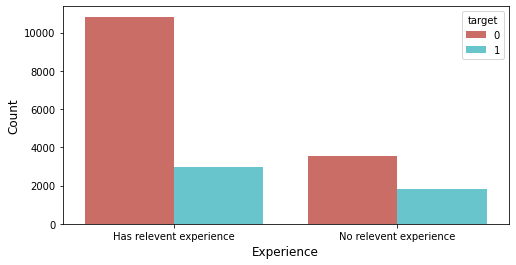

In [321]:
#Experience relation with target
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.relevent_experience, hue=df_train.target,palette='hls')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Experience', fontsize=12)
plt.show()